In [150]:
# 개발환경 - 2일차

# 1. Python(프로그램 언어)
# 2. vscode(개발도구)
# 3. LENOVO 300 FHD(카메라)
# 4. EasyOCR(라이브러리)
# 5. OpenCV(라이브러리)

In [15]:
# Import

import easyocr as eo # easyocr 라이브러리
import cv2 # opencv 라이브러리
import matplotlib.pyplot as plt 
# matplotlib(라이브러리 : 그래프를 이용하여 데이터를 시각화 해준다)
# pyplot(함수 : x,y 값들을 그래프로 데이터 시각화 해준다 - List)
import numpy as np 
# numpy (라이브러리 : 행렬/배열 및 연산등을 해준다)
from PIL import ImageFont, ImageDraw, Image, ImageFilter # PIL 이미지 분석 및 처리를 쉽게 변환해주는 라이브러리

In [14]:
# Read in Images(읽어올 이미지)

# 이미지 불러오기

img_path = 'test_dt/ad_pt2.bmp' # img_path 객체를 만들고 이미지 경로를 불러온다

# 그레이 스케일로 변형하여 이진화(0-백색,1-검정색) 작업을 해준다
#img_gray = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)


In [16]:
# 이미지를 output으로 보여주는 작업

reader = eo.Reader(['ko'], gpu=False) 
# reader 객체를 만들고, EasyOCR라이브러리 안에 Reader함수를 사용하여 셋팅한다
# Reader(함수 : 어떤 언어로 읽을 것인가? / GPU 사용유무)

result = reader.readtext(img_path)
# result 객체를 만든다
# reader 객체에서 셋팅한 속성들중 readtext함수를 사용하여 결과물을 보여준다

result 
# 결과물을 보여준다

Using CPU. Note: This module is much faster with a GPU.


[([[146, 34], [288, 34], [288, 66], [146, 66]],
  '보자 , 사리',
  0.12211469217770352),
 ([[143, 71], [611, 71], [611, 115], [143, 115]],
  '대전광역시  대덕구 대화로   106번길',
  0.6793362218411402),
 ([[620, 80], [660, 80], [660, 112], [620, 112]], '66,', 0.9999777693916273),
 ([[143, 119], [427, 119], [427, 159], [143, 159]],
  '902호 시류어 포인트',
  0.6833410613468132),
 ([[437, 123], [527, 123], [527, 159], [437, 159]], '연구소', 0.9999922915462542),
 ([[1168, 124], [1254, 124], [1254, 156], [1168, 156]],
  '우 표',
  0.24254240095615387),
 ([[551, 169], [669, 169], [669, 205], [551, 205]],
  '김 민 우',
  0.8693470134858469),
 ([[149, 217], [169, 217], [169, 245], [149, 245]], '3', 0.9999928350432712),
 ([[194, 216], [218, 216], [218, 246], [194, 246]], '4', 0.999999880790714),
 ([[244, 216], [268, 216], [268, 246], [244, 246]], '3', 1.0),
 ([[292, 216], [316, 216], [316, 246], [292, 246]], '6', 0.9999997615814351),
 ([[338, 216], [362, 216], [362, 248], [338, 248]], '5', 1.0),
 ([[703, 287], [760, 287], [7

In [17]:
# Draw Result

# 이미지를 그려서 결과로 도출

top_left = tuple(result[0][0][0])
# 왼쪽 상위

top_right = tuple(result[0][0][1])
# 오른쪽 상위

bottom_right = tuple(result[0][0][2])
# 오른쪽 하위

bottom_left = tuple(result[0][0][3])
# 왼쪽 하위

text = result[1][1]
# 이미지속 글자의 위치를 파악

font = cv2.FONT_HERSHEY_COMPLEX
# opencv에서 지원하는 폰트 스타일

# check
print(top_left)
print(top_right)
print(bottom_right)
print(bottom_left)
print(text)

(146, 34)
(288, 34)
(288, 66)
(146, 66)
대전광역시  대덕구 대화로   106번길


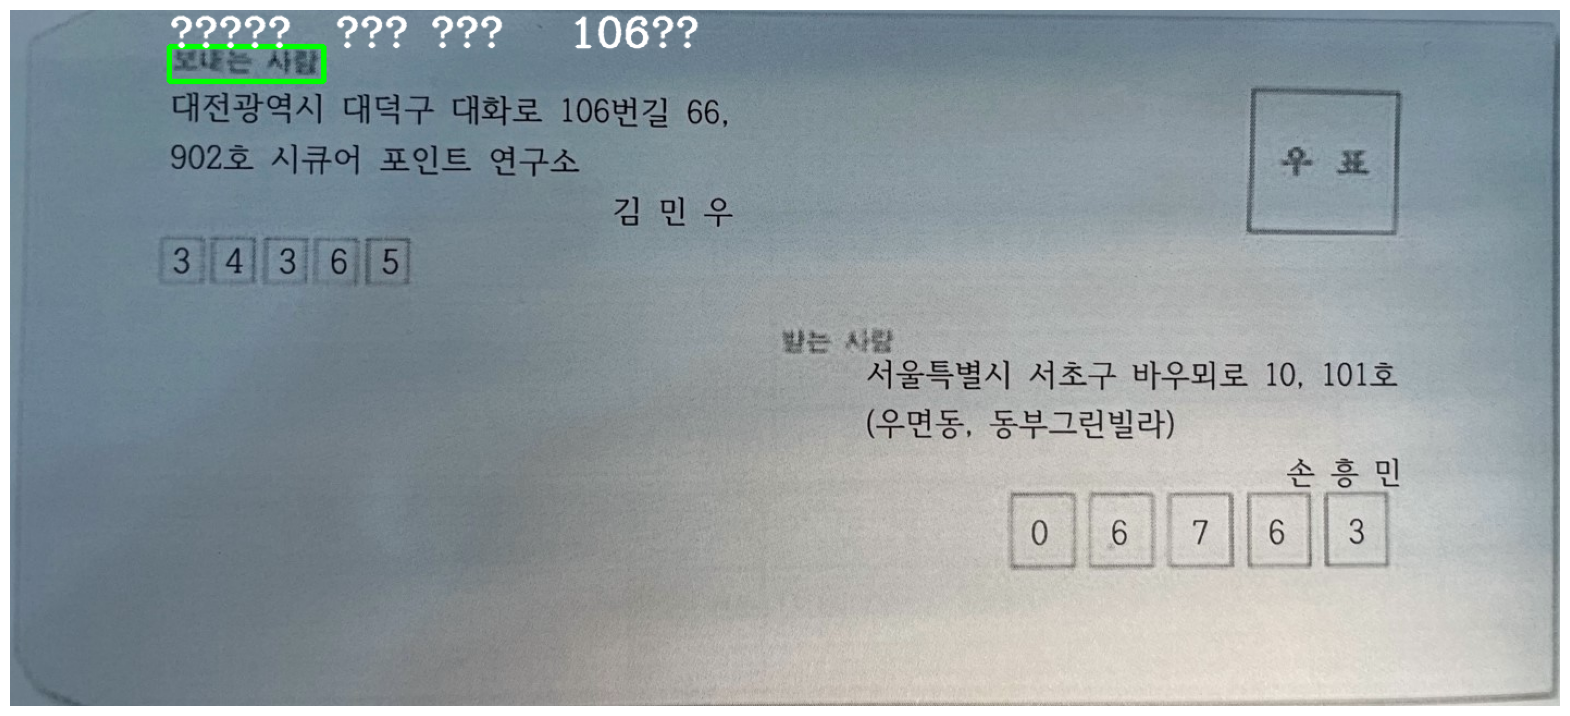

In [19]:
# 이미지속 글자를 읽고 도형을 그려서 표현

img = cv2.imread(img_path) 
# img 객체를 만들고, opencv 라이브러리 안에 imread 함수를 사용하여 이미지를 불러온다
# imread(함수 : 이미지를 읽어오는 작업을 한다)

img_tangle = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
# img_tangle 객체를 만들고, opencv 라이브러리 안에 rectangle 함수를 사용하여 이미지 글자를 읽어온 부분에 도형을 그려주는 작업을 한다
# rectangle(함수 : 사각형을 좌측 상단, 우측 하단 두곳의 좌표로 도형을 그린다)
# rectangle(이미지, pt1[시작점 좌표-x,y], pt2[종료점 좌표-x,y], color, thickness[선 두께-default는 1])
# rectangle(thickness[linetype-선 종류(cv2.LINE_4,cv2.LINE_8,cv2.LINE_AA), shift-그리기 좌표 값의 축소 비율, 기본값은 0이다])

img_ptt = cv2.putText(img, text, top_left, font, 1.25, (255, 255, 255), 2, cv2.LINE_AA)
# img_ptt 객체를 만들고, opencv 라이브러리 안에 putText 함수를 사용하여 문자열을 출력한다
# putText(함수 : 문자열을 출력해주는 함수이다)
# putText(img, text(출력할 문자열), org(문자열을 출력할 위치의 좌측 하단 좌표(x,y)튜플), fontFace(폰트종류),
#         fontScale(폰트 크기 확대/축소 비율), thickness, lineType, bottomLeftOrigin(True이면 좌측 하단을 원점으로 간주한다/기본값은 False이다))

plt.figure(figsize=(20,15))
# pyplot 함수 안에 figure 함수를 사용하여 그래프 사이즈를 조절해 준다
# figsize 옵션을 설정하여 가로길이(x축), 세로길이(y축)를 조절해 준다
# 단위는 inch이다


plt.imshow(img)
# pyplot 함수 안에 imshow 함수를 사용하여 행렬을 만들어 각 칸에 원하는 색으로 채워준다
# imshow 색상 표현 - Colormap(default,chnage), RGB, RGBA : 4가지
# colormap[default] - 3행 3열의 행렬을 만들고 각 값을 채우는 것을 말한다
# colormap[change] - cmap 옵션을 이용하여 색상으로 표현한다
# RGB - red, green, blue 값 색상을 채운다는 의미이다. 값을 표현하면 0-1사이 실수 or 0-255사이 정수로도 표현한다.
# RGBA - red, green, blue, alpha 값으로 색상을 채운다는 의미다. 값을 표현하면 0-1사이 실수 or 0-255사이 정수로 입력하고 투명도는 0-1사이 정수로 표현한다

plt.axis('off')
# axis 함수는 x,y좌표를 그래프로 표현할때 숨겨주는 역할을 해준다

plt.show()
# pyplot 함수 안에 show 함수를 사용하여 그래프로 이미지를 표현해준다
